In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('C:/Users/User/Desktop/SCMS_Delivery_History_Dataset.csv')
column_details=pd.read_csv('C:/Users/User/Downloads/SCMS_Delivery_History_Dataset_Data_Dictionary_20150929 (2) (1).csv')

C:\Users\User\AppData\Local\Temp\ipykernel_14976\3823442392.py:2: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  column_details=pd.read_csv('C:/Users/User/Downloads/SCMS_Delivery_History_Dataset_Data_Dictionary_20150929 (2) (1).csv')


In [3]:
data['Country']=="india"

0        False
1        False
2        False
3        False
4        False
         ...  
10319    False
10320    False
10321    False
10322    False
10323    False
Name: Country, Length: 10324, dtype: bool

In [4]:
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [5]:
column_details

,ID,FieldName,FieldDescription,FieldNotes,DataType
0,1.0,ID,Primary key indentifer of the line of data in ...,NaN,Number
1,2.0,Project Code,Project code,Only includes PEPFAR project codes,Text
2,3.0,PQ #,Price quote (PQ) number,"""Pre-PQ Process"" indicates deliveries that occ...",Text
3,4.0,PO #,Order number: Purchase order (PO) for Direct D...,PO # is not applicable for from RDC deliveries...,Text
4,5.0,ASN/DN #,Shipment number: Advanced Shipment Note (ASN) ...,NaN,Text
...,...,...,...,...,...
1032222,NaN,Weight (Kilograms),NaN,NaN,NaN
1032223,NaN,Freight Cost (USD),NaN,NaN,NaN
1032224,NaN,Freight Cost Per Kilo (USD),NaN,NaN,NaN
1032225,NaN,Line Item Insurance,NaN,NaN,NaN


In [6]:
data.shape

(10324, 33)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [8]:
data.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

Converting Freight Cost and weight into Float data type and we may loos some of the data rows having obeject data dypes

In [9]:
# replacing reffered cost and weight of 'Freight Cost (USD)' and 'Weight (Kilograms)' to actual value

total_rows = data.shape[0]
for index in range(total_rows):
    cost = data.loc[index]['Freight Cost (USD)']
    if 'See' in cost:
        id = cost.split(':')[1].split(')')[0]
        id = int(id)   
        
        actual_cost_of_id =  data[data['ID']==id]['Freight Cost (USD)'].values[0]
        data['Freight Cost (USD)'].loc[index] = actual_cost_of_id # have to use loc after column slection else replace will not work
    
    
    weight = data.loc[index]['Weight (Kilograms)']
    if 'See' in weight:
        id = weight.split(':')[1].split(')')[0]
        id = int(id)   

        actual_weight_of_id =  data[data['ID']==id]['Weight (Kilograms)'].values[0]
        data['Weight (Kilograms)'].loc[index] = actual_weight_of_id # have to use loc aftr column slection else replace will not work

C:\Users\User\AppData\Local\Temp\ipykernel_14976\3005246911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Freight Cost (USD)'].loc[index] = actual_cost_of_id # have to use loc after column slection else replace will not work
C:\Users\User\AppData\Local\Temp\ipykernel_14976\3005246911.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weight (Kilograms)'].loc[index] = actual_weight_of_id # have to use loc aftr column slection else replace will not work


In [10]:
data['Weight (Kilograms)'].value_counts()

Weight Captured Separately    1633
112                             31
54                              30
2                               29
6                               28
                              ... 
10373                            1
13147                            1
27549                            1
2637                             1
1392                             1
Name: Weight (Kilograms), Length: 3389, dtype: int64

In [11]:
data.sample(5)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
4951,53691,104-CI-T30,FPQ-13602,SCMS-228060,ASN-28330,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,100,1470,117600.00,80.00,0.80,"Alere Medical Co., Ltd.",Yes,595,7651.46,120.89
9230,85453,104-CI-T30,FPQ-12800,SO-46380,DN-3601,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Air,...,60,1481,3184.15,2.15,0.04,"Aurobindo Unit III, India",Yes,141,1400,3.94
1422,11078,111-MZ-T01,Pre-PQ Process,SO-33430,DN-1529,Mozambique,PMO - US,From RDC,N/A - From RDC,Air,...,60,1788,5721.60,3.20,0.05,"Cipla, Goa, India",Yes,205,1380.45,12.34
5326,60778,109-TZ-T30,FPQ-12868,SCMS-205690,ASN-23213,Tanzania,PMO - US,Direct Drop,EXW,Air,...,60,20000,223800.00,11.19,0.19,Mylan (formerly Matrix) Nashik,Yes,2039,9182.45,276.84
9810,86172,103-ZW-T30,FPQ-13967,SO-48440,DN-4157,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,4550,16380.00,3.60,0.06,Mylan (formerly Matrix) Nashik,No,15222,18513.23,16.84


In [12]:
data['weight_numeric']=pd.to_numeric(data['Weight (Kilograms)'],errors='coerce',downcast='integer')

In [13]:
data['weight_catagoric']=np.where(data['weight_numeric'].isnull(),data['weight_numeric'],np.nan)

In [14]:
data['Freight']=pd.to_numeric(data['Freight Cost (USD)'],errors='coerce',downcast='integer')

In [15]:
data['Freight_catagoric']=np.where(data['Freight'].isnull(),data['Freight'],np.nan)

In [16]:
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'weight_numeric', 'weight_catagoric',
       'Freight', 'Freight_catagoric'],
      dtype='object')

In [17]:
data.drop(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #','PQ First Sent to Client Date','PO Sent to Vendor Date','Weight (Kilograms)','Freight Cost (USD)','weight_catagoric','Freight_catagoric'],axis=1,inplace=True)

In [18]:
data.rename(columns={'weight_numeric': 'Weight (Kilograms)', 'Freight': 'Freight Cost (USD)'}, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     10324 non-null  object 
 1   Managed By                  10324 non-null  object 
 2   Fulfill Via                 10324 non-null  object 
 3   Vendor INCO Term            10324 non-null  object 
 4   Shipment Mode               9964 non-null   object 
 5   Scheduled Delivery Date     10324 non-null  object 
 6   Delivered to Client Date    10324 non-null  object 
 7   Delivery Recorded Date      10324 non-null  object 
 8   Product Group               10324 non-null  object 
 9   Sub Classification          10324 non-null  object 
 10  Vendor                      10324 non-null  object 
 11  Item Description            10324 non-null  object 
 12  Molecule/Test Type          10324 non-null  object 
 13  Brand                       103

In [20]:
data.shape

(10324, 26)

Scheduled Delivery Date ,  Delivered to Client Date ,  Delivery Recorded Date columns are in object data type  covenrting theese into datetime type

In [21]:
data['Scheduled Delivery Date'] =pd.to_datetime(data['Scheduled Delivery Date'])

In [22]:
data['Delivered to Client Date'] =pd.to_datetime(data['Delivered to Client Date'])

In [23]:
data['Delivery Recorded Date'] =pd.to_datetime(data['Delivery Recorded Date'])

In [24]:
#data["delivery_ delay"]=data['Scheduled Delivery Date']-data['Delivery Recorded Date']

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Country                     10324 non-null  object        
 1   Managed By                  10324 non-null  object        
 2   Fulfill Via                 10324 non-null  object        
 3   Vendor INCO Term            10324 non-null  object        
 4   Shipment Mode               9964 non-null   object        
 5   Scheduled Delivery Date     10324 non-null  datetime64[ns]
 6   Delivered to Client Date    10324 non-null  datetime64[ns]
 7   Delivery Recorded Date      10324 non-null  datetime64[ns]
 8   Product Group               10324 non-null  object        
 9   Sub Classification          10324 non-null  object        
 10  Vendor                      10324 non-null  object        
 11  Item Description            10324 non-null  object    

checxking for null values

In [26]:
data.isnull().sum()

Country                          0
Managed By                       0
Fulfill Via                      0
Vendor INCO Term                 0
Shipment Mode                  360
Scheduled Delivery Date          0
Delivered to Client Date         0
Delivery Recorded Date           0
Product Group                    0
Sub Classification               0
Vendor                           0
Item Description                 0
Molecule/Test Type               0
Brand                            0
Dosage                        1736
Dosage Form                      0
Unit of Measure (Per Pack)       0
Line Item Quantity               0
Line Item Value                  0
Pack Price                       0
Unit Price                       0
Manufacturing Site               0
First Line Designation           0
Line Item Insurance (USD)      287
Weight (Kilograms)            1633
Freight Cost (USD)            1786
dtype: int64

In [27]:
data.describe()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD),Weight (Kilograms),Freight Cost (USD)
count,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000,8691.000000,8538.000000
mean,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626,4464.293407,12641.908460
std,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568,13372.409407,18189.924017
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.750000
25%,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000,275.000000,2599.090000
50%,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000,1303.000000,6759.280000
75%,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000,4364.000000,15571.480000
max,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000,857354.000000,289653.200000


Ploting Displot and Boxplot for each numarical columns to check distribution and Outliers

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit of Measure (Per Pack)', ylabel='Density'>

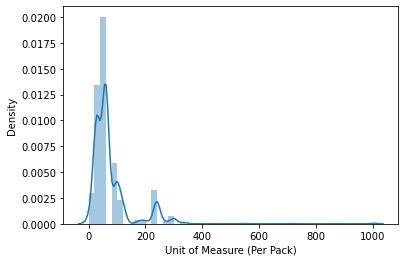

In [28]:

sns.distplot(data['Unit of Measure (Per Pack)'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unit of Measure (Per Pack)'>

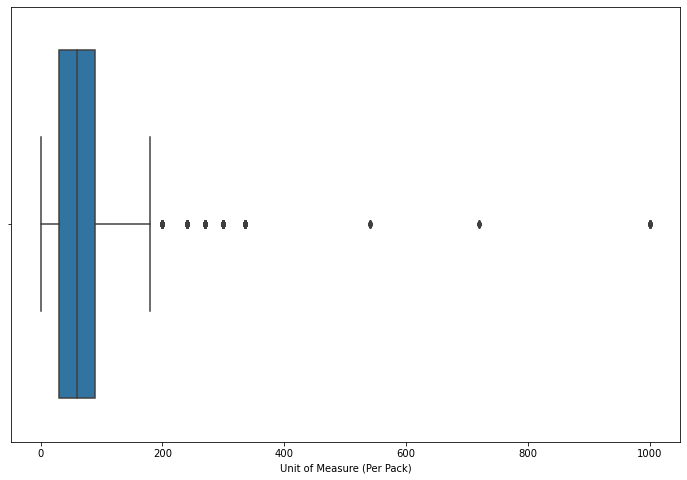

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(data['Unit of Measure (Per Pack)'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Line Item Quantity', ylabel='Density'>

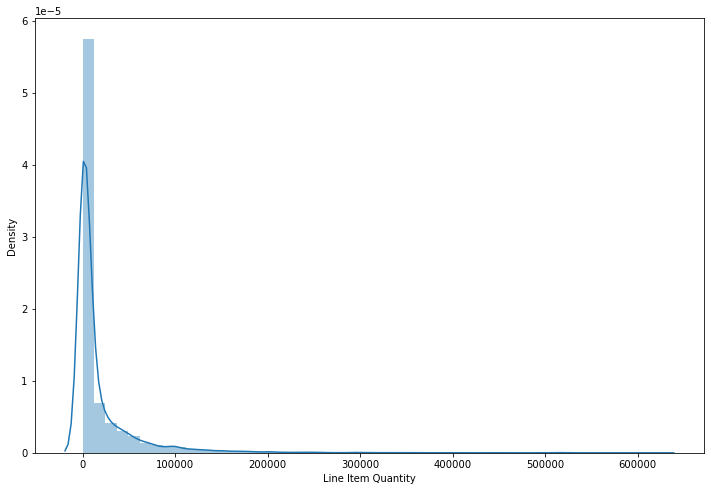

In [30]:
plt.figure(figsize=(12,8))
sns.distplot(data['Line Item Quantity'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Line Item Quantity'>

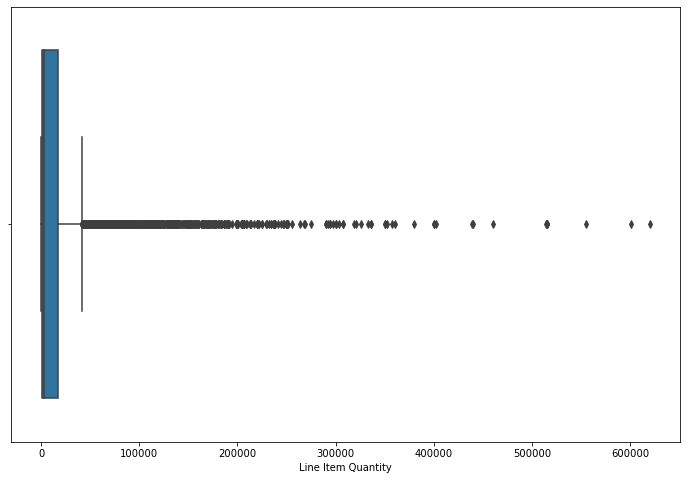

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(data['Line Item Quantity'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Line Item Value', ylabel='Density'>

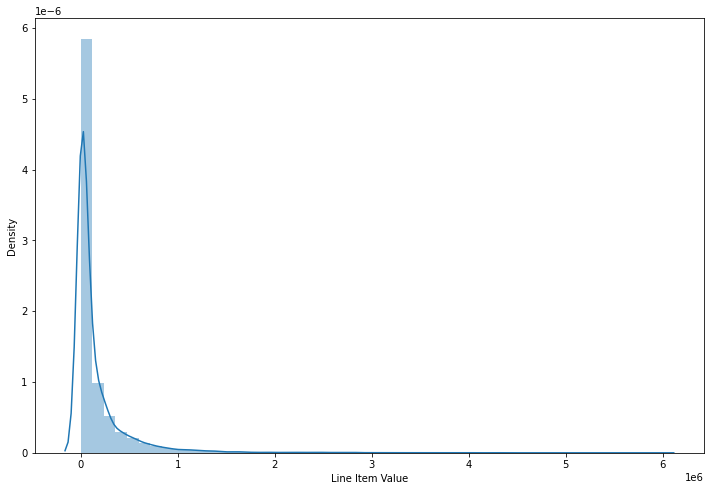

In [32]:
plt.figure(figsize=(12,8))
sns.distplot(data['Line Item Value'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Line Item Value'>

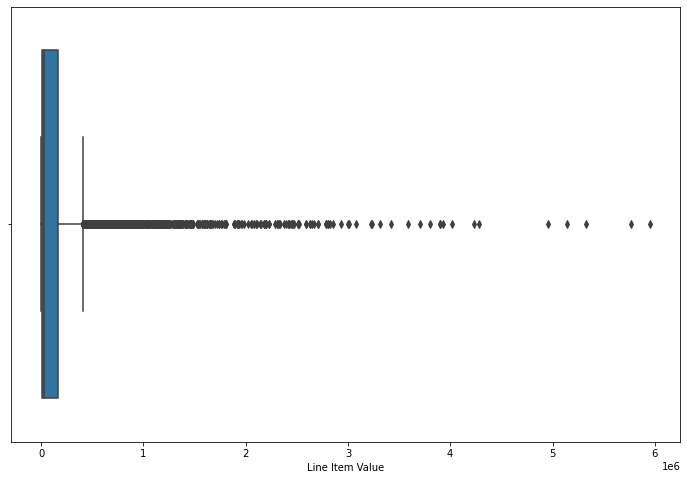

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(data['Line Item Value'])

<Figure size 864x576 with 0 Axes>

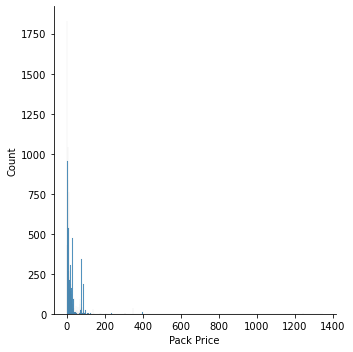

In [34]:
plt.figure(figsize=(12,8))
sns.displot(data['Pack Price'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pack Price'>

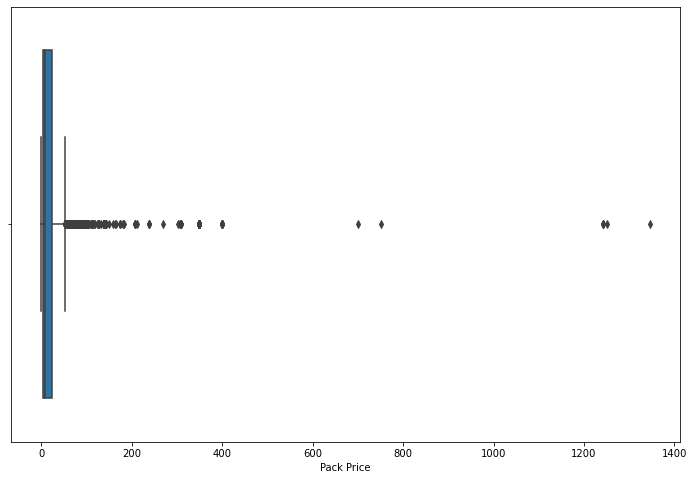

In [35]:
plt.figure(figsize=(12,8))

sns.boxplot(data['Pack Price'])

<Figure size 864x576 with 0 Axes>

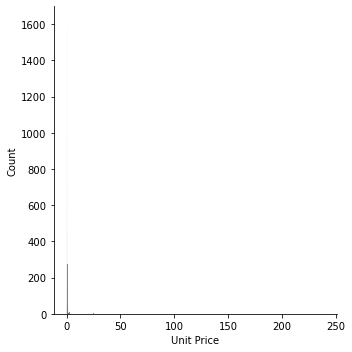

In [36]:
plt.figure(figsize=(12,8))
sns.displot(data['Unit Price'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unit Price'>

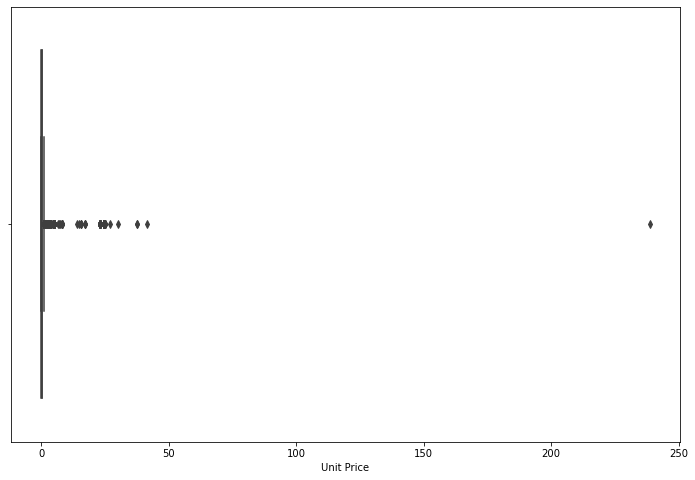

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(data['Unit Price'])

<Figure size 864x576 with 0 Axes>

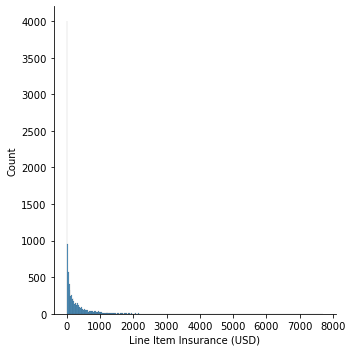

In [38]:
plt.figure(figsize=(12,8))
sns.displot(data['Line Item Insurance (USD)'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Line Item Insurance (USD)'>

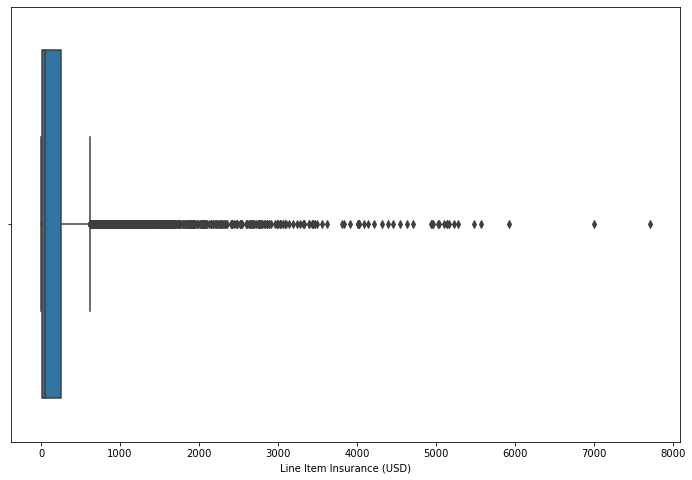

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(data['Line Item Insurance (USD)'])

all numarical columns seems not distibuted well and have Outliers 

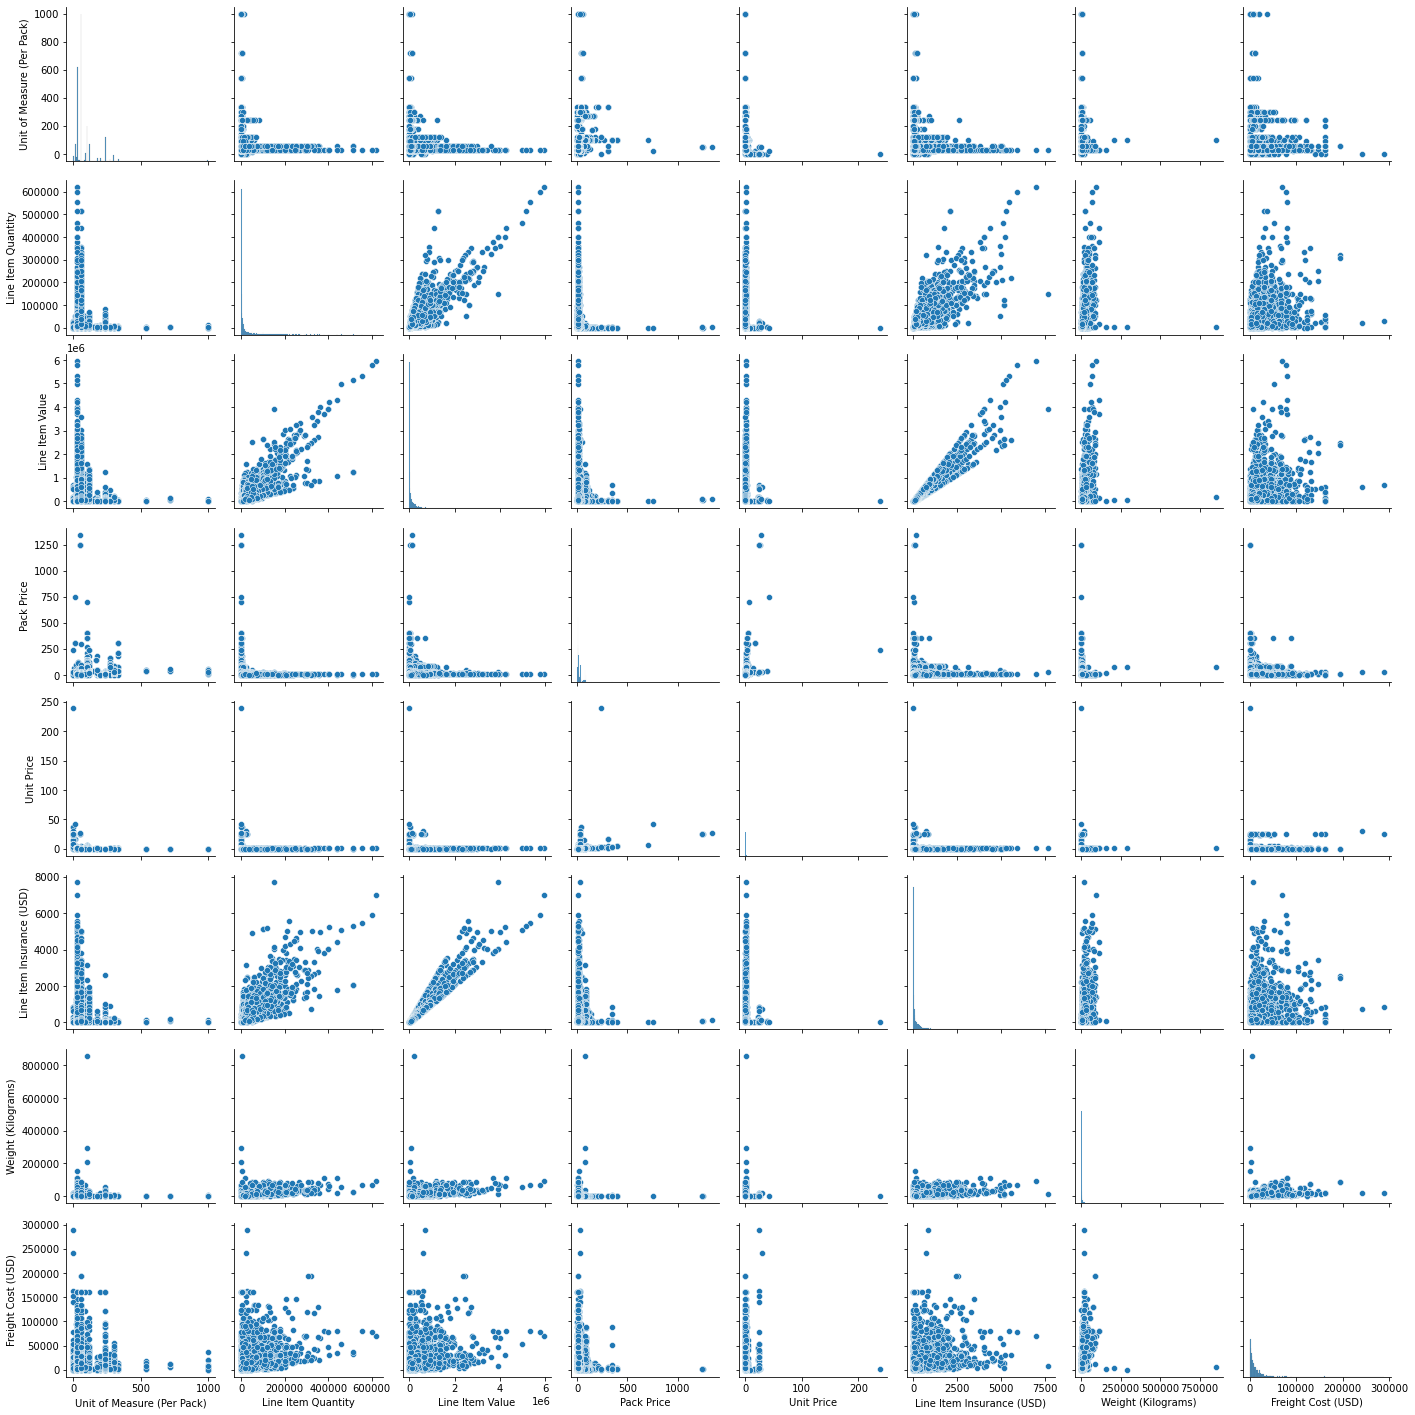

In [40]:
sns.pairplot(data)

pairplot clearly show that the data is numerical coiumns are mosttly no-linear to eache Other

In [41]:
data.head()

,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Line Item Insurance (USD),Weight (Kilograms),Freight Cost (USD)
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,2006-06-02,2006-06-02,2006-06-02,HRDT,HIV test,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,NaN,13.0,780.34
1,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-11-14,2006-11-14,2006-11-14,ARV,Pediatric,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,NaN,358.0,4521.50
2,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,2006-08-27,2006-08-27,2006-08-27,HRDT,HIV test,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,NaN,171.0,1653.78
3,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-09-01,2006-09-01,2006-09-01,ARV,Adult,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,NaN,1855.0,16007.06
4,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-08-11,2006-08-11,2006-08-11,ARV,Adult,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,NaN,7590.0,45450.08


droping columns ID', 'Project Code, PQ #, PO / SO #, ASN/DN #  since these columns are not required for my analasys

In [42]:
pd.set_option('display.max_columns',40)

In [43]:
data.head(2)

,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Line Item Insurance (USD),Weight (Kilograms),Freight Cost (USD)
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,2006-06-02,2006-06-02,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,NaN,13.0,780.34
1,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-11-14,2006-11-14,2006-11-14,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",Yes,NaN,358.0,4521.50


In [44]:
column_details.head(6)

,ID,FieldName,FieldDescription,FieldNotes,DataType
0,1.0,ID,Primary key indentifer of the line of data in ...,NaN,Number
1,2.0,Project Code,Project code,Only includes PEPFAR project codes,Text
2,3.0,PQ #,Price quote (PQ) number,"""Pre-PQ Process"" indicates deliveries that occ...",Text
3,4.0,PO #,Order number: Purchase order (PO) for Direct D...,PO # is not applicable for from RDC deliveries...,Text
4,5.0,ASN/DN #,Shipment number: Advanced Shipment Note (ASN) ...,NaN,Text
5,6.0,Country,Destination country,NaN,Text


Checking variable country and Visualising


In [45]:
data['Country'].unique()

array(["Côte d'Ivoire", 'Vietnam', 'Nigeria', 'Zambia', 'Tanzania',
       'Rwanda', 'Haiti', 'Zimbabwe', 'Ethiopia', 'South Africa',
       'Guyana', 'Namibia', 'Botswana', 'Mozambique', 'Kenya',
       'Kazakhstan', 'Uganda', 'Kyrgyzstan', 'Senegal', 'Benin',
       'Lesotho', 'Pakistan', 'Swaziland', 'Ghana', 'Angola', 'Lebanon',
       'Sierra Leone', 'Cameroon', 'South Sudan', 'Burundi',
       'Dominican Republic', 'Malawi', 'Congo, DRC', 'Sudan', 'Mali',
       'Guatemala', 'Togo', 'Afghanistan', 'Liberia', 'Burkina Faso',
       'Guinea', 'Libya', 'Belize'], dtype=object)

In [46]:
# checking value counts for each country
data['Country'].value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                     3
A

In [47]:
topp_10_countries=data['Country'].value_counts()[:10].reset_index()

ploting top 10 countries


In [48]:
data['Country'].value_counts()[:10].index

Index(['South Africa', 'Nigeria', 'Côte d'Ivoire', 'Uganda', 'Vietnam',
       'Zambia', 'Haiti', 'Mozambique', 'Zimbabwe', 'Tanzania'],
      dtype='object')

<AxesSubplot:>

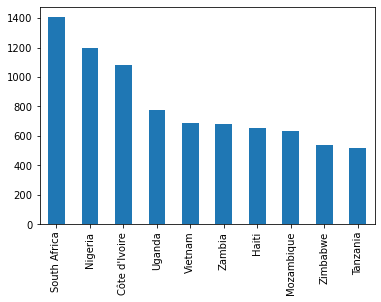

In [49]:

data['Country'].value_counts()[:10].plot(kind="bar",)

checking Top 10 Countries relation with frirght cost

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


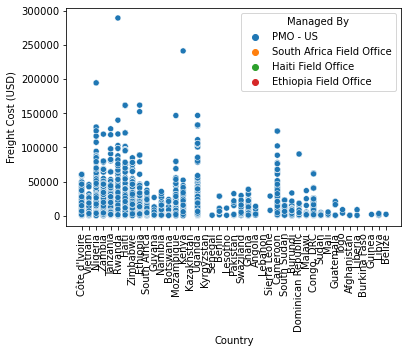

In [50]:
sns.scatterplot(data['Country'],data['Freight Cost (USD)'],hue=data['Managed By'])
plt.xticks( rotation='vertical')
plt.show()

Since Most oof countres are Managed by PMO-US  Iam assuming it is a us based company

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


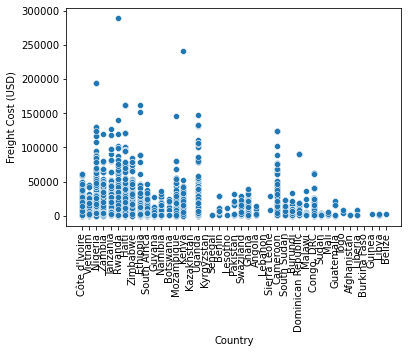

In [51]:
sns.scatterplot(data['Country'],data['Freight Cost (USD)'])
plt.xticks( rotation='vertical')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


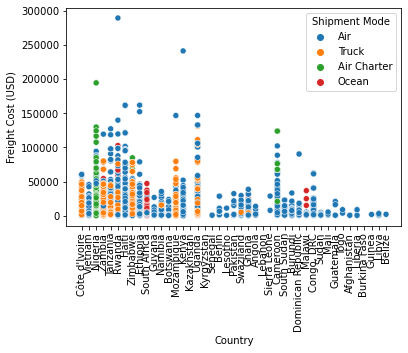

In [52]:
sns.scatterplot(data['Country'],data['Freight Cost (USD)'],hue=data['Shipment Mode'])
plt.xticks( rotation='vertical')
plt.show()

Most of the countries get their shipmenet by Air And Nigeria got their most shipment by Air Charter ,may be 2 or 3 by air shipment

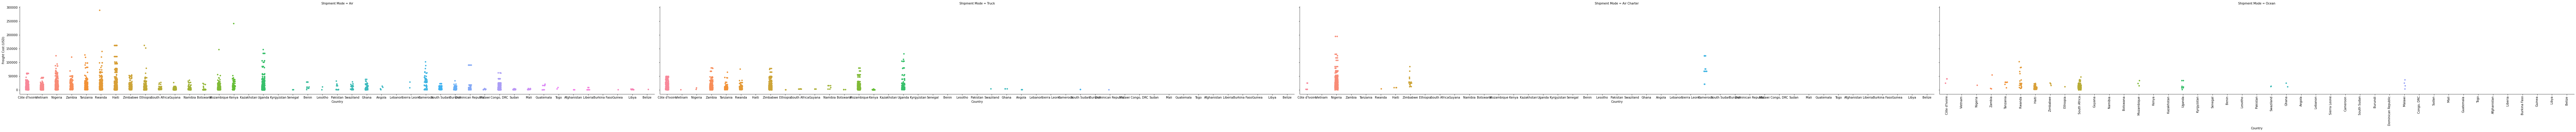

In [53]:
sns.catplot(data=data, y="Freight Cost (USD)",x="Country",height=5,aspect=6,col='Shipment Mode')
plt.xticks( rotation='vertical')
plt.show()

Haiti freight cost is more in Air shipment ,uganda shipment is more in truck shipmentr,Nogeria freight cost is more in Air charter shipment,Rwanda freight cost is moere in Ocean shipment 

checking column Managed By and releation with shipment mode





In [54]:
data['Managed By'].value_counts()

PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: Managed By, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


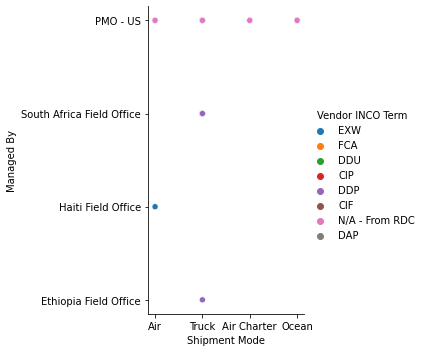

In [55]:
sns.relplot(data['Shipment Mode'],data['Managed By'],hue=data['Vendor INCO Term'])

PMO-US has sent  items through all four shipment mode , Health Field Office used air shipment method

PMO-US sent items only through N/A --From RDC ,Southafrica Africa Field Office and Ethiopia Field Office used DDD as vendos and Health Field Office EXW as vendor

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


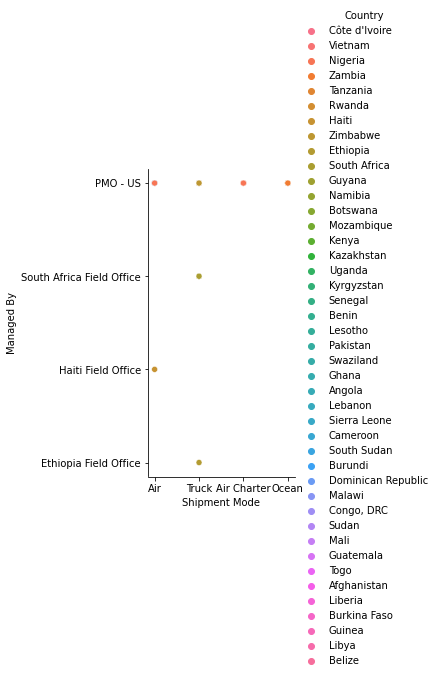

In [56]:
sns.relplot(data['Shipment Mode'],data['Managed By'],hue=data['Country'])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'PMO - US'),
  Text(1, 0, 'South Africa Field Office'),
  Text(2, 0, 'Haiti Field Office'),
  Text(3, 0, 'Ethiopia Field Office')])

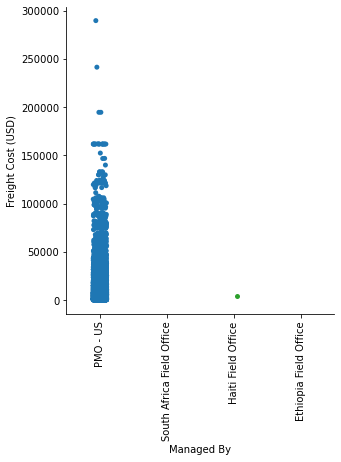

In [57]:
sns.catplot(x="Managed By", y="Freight Cost (USD)", data=data)
plt.xticks( rotation='vertical')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Managed By', ylabel='Freight Cost (USD)'>

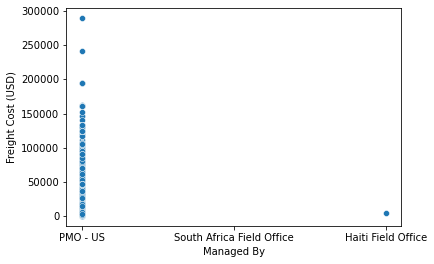

In [58]:

sns.scatterplot(data['Managed By'],data['Freight Cost (USD)'])

PMO-US  Freight between 0-150000 $ and otliers maximum was nearly 300000$

In [59]:

#variable  Fulfill Via

In [60]:
data['Fulfill Via'].value_counts()

From RDC       5404
Direct Drop    4920
Name: Fulfill Via, dtype: int64

RDC meaning DEFINITION. A Regional Distribution Center (RDC) is a collection and consolidation center for finished goods, components and spare parts produced by its own group of companies for its own brand to be distributed to dealers, importers or its subsidiaries or other unrelated companies within or outside the country.

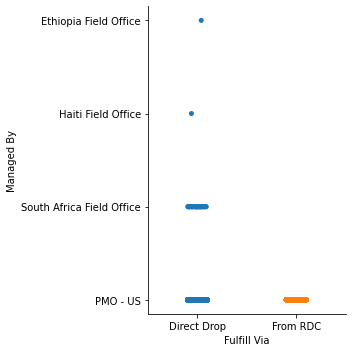

In [61]:
sns.catplot(x='Fulfill Via',y='Managed By',data=data)

PMO-US has used both Direct drop and RDC and remaing used only Dricet drop 

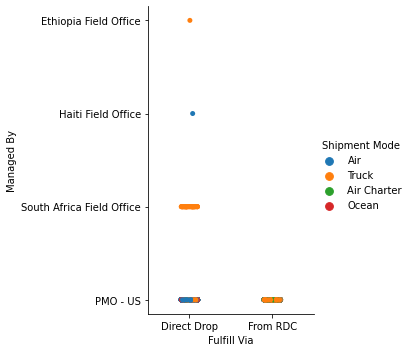

In [62]:
sns.catplot(x='Fulfill Via',y='Managed By',hue='Shipment Mode',data=data)

PMO-US has used Air and Truck shipment modes in both Direct Drop and From RDC,Oceam Shipment mode incase of Director Drop where Hailti Office  used Only Air Shipment Mode in Diorect Drop 

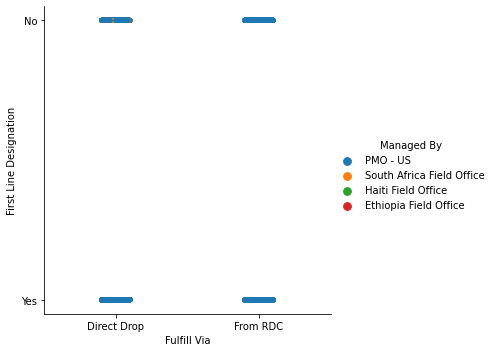

In [63]:
sns.catplot(x='Fulfill Via',y='First Line Designation',hue='Managed By',data=data)

in Fullfil via both Direct Drop And From Rdc has first Line Desigination as YES and NO  Hailti Field office  not in Line Desigination

column vendor INCO Term checking relation with other columns

In [64]:
data['Vendor INCO Term'].value_counts()

N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: Vendor INCO Term, dtype: int64

there are more rows having N/A - From RDC as Vendor INCO Term

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'EXW'),
  Text(1, 0, 'FCA'),
  Text(2, 0, 'DDU'),
  Text(3, 0, 'CIP'),
  Text(4, 0, 'DDP'),
  Text(5, 0, 'CIF'),
  Text(6, 0, 'N/A - From RDC'),
  Text(7, 0, 'DAP')])

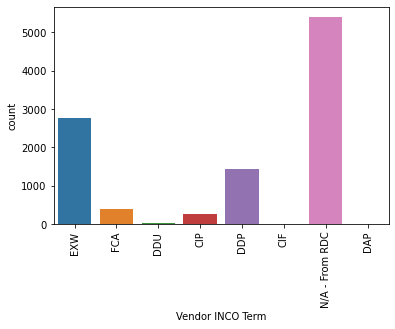

In [65]:
sns.countplot(data['Vendor INCO Term'])
plt.xticks( rotation='vertical')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vendor INCO Term', ylabel='Freight Cost (USD)'>

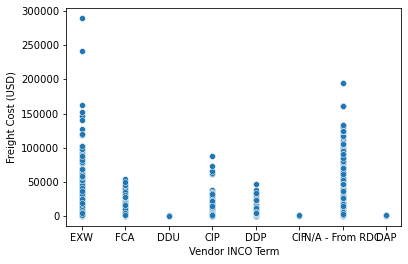

In [66]:
sns.scatterplot(data['Vendor INCO Term'],data['Freight Cost (USD)'])

In vendor INCO Term From RDC have more friegth cost Around 150000  ,EXWAround100000  and some outliers,DDP,FCA,CIP are in between 0-50000  butCF,DDU,DAPAremightbe100or200

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

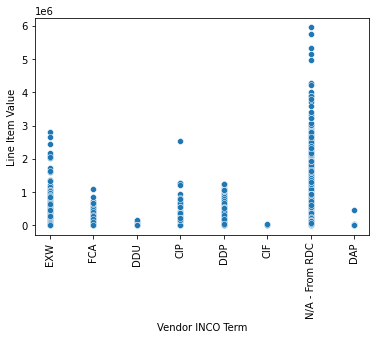

In [67]:
sns.scatterplot(data['Vendor INCO Term'],data['Line Item Value'])
plt.xticks( rotation='vertical')


From RDC is shipping  more item value compared any othee vendor INCO Term

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vendor INCO Term', ylabel='Line Item Quantity'>

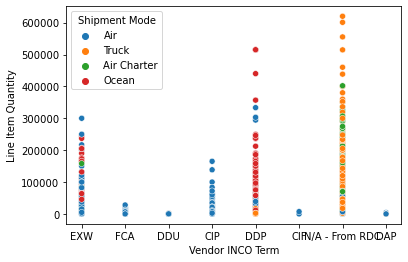

In [68]:
sns.scatterplot(data['Vendor INCO Term'],data['Line Item Quantity'],hue=data['Shipment Mode'])

From RDC  more line Quantity  in Air,Truck.and Air Charter shipment mode DDP has more line Item Quantity in Ocean Shipment Mode

In [69]:
data['Shipment Mode'].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment Mode, dtype: int64

More Items are shipping in Air shipment mode 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shipment Mode', ylabel='Freight Cost (USD)'>

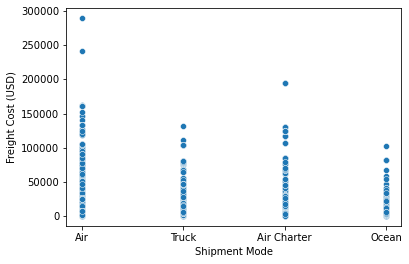

In [70]:
sns.scatterplot('Shipment Mode','Freight Cost (USD)',data=data)

Air shipment mode is costly as compared to other shoment modes

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shipment Mode', ylabel='Weight (Kilograms)'>

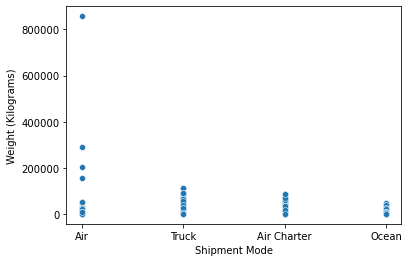

In [71]:
sns.scatterplot('Shipment Mode','Weight (Kilograms)',data=data,)

Air shipment mode is carrying more weight but Truch and Air Charter Shipments carrying consistant weights

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shipment Mode', ylabel='Product Group'>

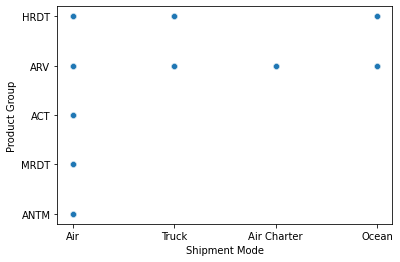

In [72]:
sns.scatterplot('Shipment Mode','Product Group',data=data)

Air shipment mode is carrying more product Groups compared other modes

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


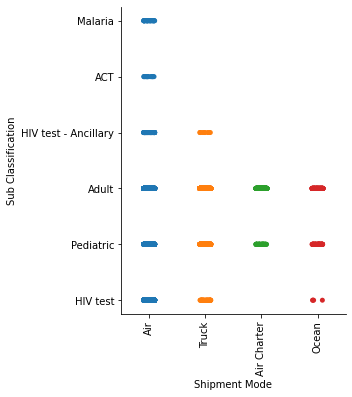

In [73]:
sns.catplot('Shipment Mode','Sub Classification',data=data,)
plt.xticks( rotation='vertical')
plt.show()

Air shipment mode is shipping all sub classifications  but other modes are shipping maximum 4 sub classifications

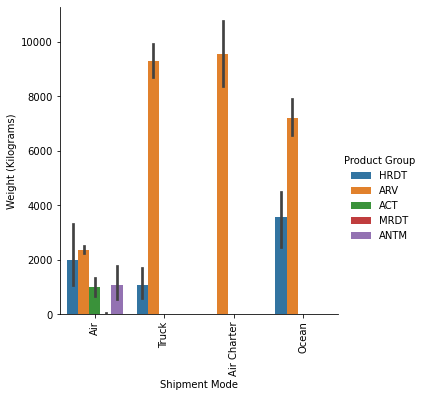

In [74]:
sns.catplot(x="Shipment Mode",hue="Product Group", y="Weight (Kilograms)", kind="bar", data=data)
plt.xticks( rotation='vertical')
plt.show()


In Air shipment mode prod3uct groups HRDT,ARV,ACT,MRDT,ANTM are shipping with less weight with maximum weight of nesrly 2500 kgs. But in Truck and OCean shipment mode product group ARV is shipping more and product group HRDT is shipping less.In Air Charter shipping mode oinly product group ARV is shipping

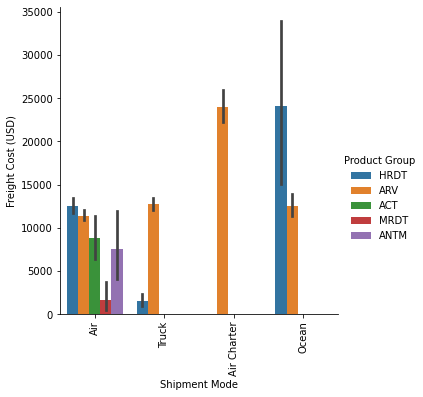

In [75]:
sns.catplot(x="Shipment Mode",hue="Product Group", y="Freight Cost (USD)", kind="bar", data=data)
plt.xticks( rotation='vertical')
plt.show()

Ocean and Air Charter shipment modes shipping product group HRDT and ARV with max freight cost of 25000

Product Group varable

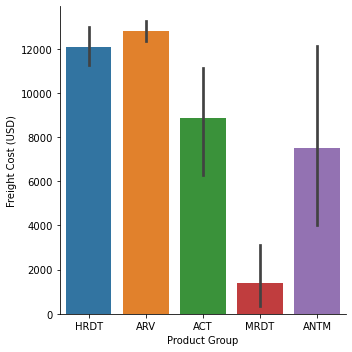

In [76]:
sns.catplot(x="Product Group", y="Freight Cost (USD)", kind="bar", data=data)

ARV Product group shipping with more freight cost of >120000 usd  next HRDT with 120000 usd

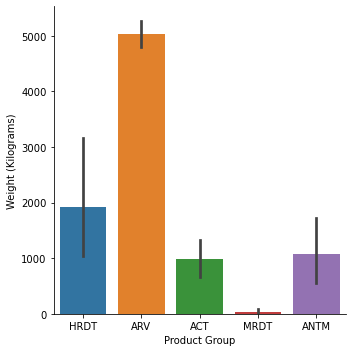

In [77]:
sns.catplot(x="Product Group", y="Weight (Kilograms)",kind="bar", data=data)

product grioup ARV shiiping more weight with 5000kgs 

Sub Classification	 variable

In [78]:
data['Sub Classification'].value_counts()

Adult                   6595
Pediatric               1955
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: Sub Classification, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


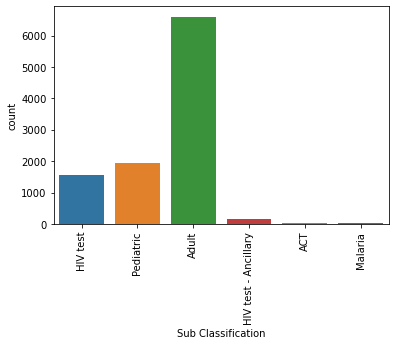

In [79]:
sns.countplot(data['Sub Classification'])
plt.xticks( rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Sub Classification', ylabel='Freight Cost (USD)'>

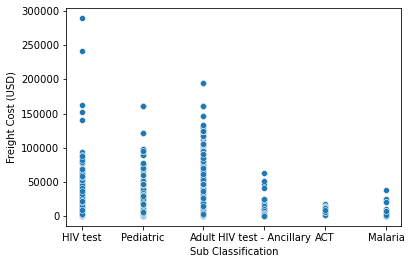

In [80]:
sns.scatterplot(x='Sub Classification',y='Freight Cost (USD)',data=data)

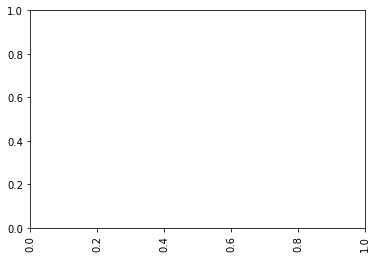

In [81]:
#sns.catplot(x='Sub Classification',y='Freight Cost (USD)',data=data,kind='swarm')
plt.xticks( rotation='vertical')
plt.show()

If We Consider HIV Test points as outliers Adult ,pediatric subclassification has more fright cost

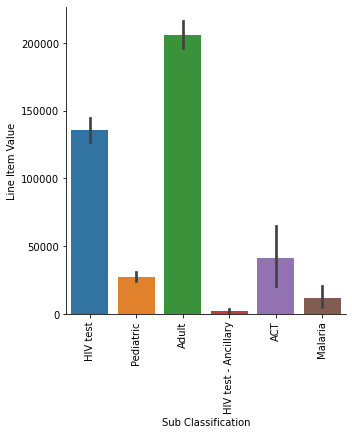

In [82]:
sns.catplot(x='Sub Classification',y='Line Item Value',data=data,kind='bar')
plt.xticks( rotation='vertical')
plt.show()

Adult Sub Classification items are more in LIne Item Values

In [83]:
data['Brand'].value_counts()

Generic            7285
Determine           799
Uni-Gold            373
Aluvia              250
Kaletra             165
Norvir              136
Stat-Pak            115
Bioline             113
Truvada              94
Videx                84
Colloidal Gold       70
Stocrin/Sustiva      69
OraQuick             60
Invirase             53
Viread               52
Zerit                46
Isentress            44
Epivir               42
Prezista             42
Videx EC             41
Retrovir             41
Ziagen               37
Crixivan             36
Capillus             35
Intelence            32
Genie                30
Viramune             28
Clearview            19
Trizivir             18
Reyataz              18
Atripla              16
First Response       15
Coartem              12
Viracept             11
DoubleCheck           5
INSTi                 5
Multispot             5
Paramax               5
LAV                   4
Combivir              3
Reveal                3
ImmunoComb      

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


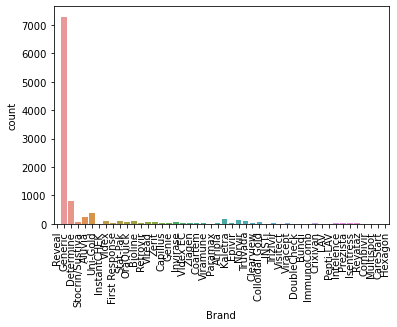

In [84]:
sns.countplot(data['Brand'],orient= 'h')
plt.xticks( rotation='vertical')
plt.show()

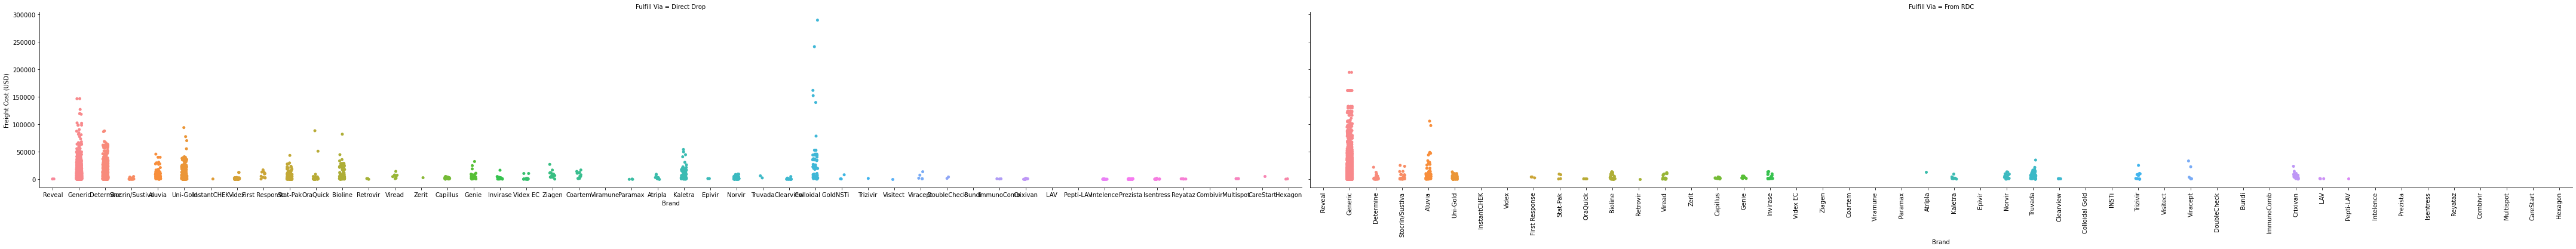

In [85]:
sns.catplot(data=data, y="Freight Cost (USD)",x="Brand",height=5,aspect=6,col='Fulfill Via')
plt.xticks( rotation='vertical')
plt.show()

Generic brand has high freight cost in Both From RDC and Direct Drop 

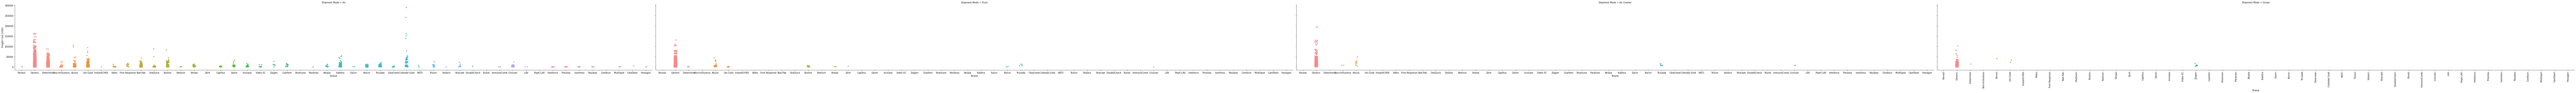

In [86]:
sns.catplot(data=data,x="Brand",y="Freight Cost (USD)",height=5,aspect=8,col='Shipment Mode')
plt.xticks( rotation='vertical')
plt.show()

Generic ,Deermine brand are shipping more in Air shipment mode and generic brand is shipping in all shiping modes

variable First Line Designation

In [87]:
data['First Line Designation'].value_counts()

Yes    7030
No     3294
Name: First Line Designation, dtype: int64

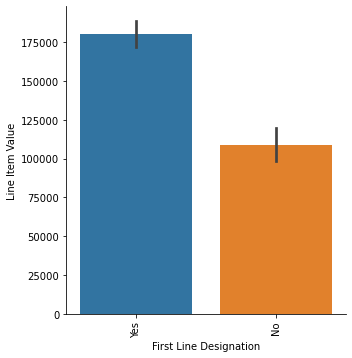

In [88]:
sns.catplot(x='First Line Designation',y='Line Item Value',data=data,kind='bar')
plt.xticks( rotation='vertical')
plt.show()

more items are in where  first line destination is yes 

In [89]:
data.head()

,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Line Item Insurance (USD),Weight (Kilograms),Freight Cost (USD)
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,2006-06-02,2006-06-02,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,NaN,13.0,780.34
1,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-11-14,2006-11-14,2006-11-14,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,NaN,358.0,4521.50
2,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,2006-08-27,2006-08-27,2006-08-27,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,NaN,171.0,1653.78
3,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-09-01,2006-09-01,2006-09-01,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,NaN,1855.0,16007.06
4,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-08-11,2006-08-11,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,NaN,7590.0,45450.08


In [90]:
#data['Weight (Kilograms)'].mean()

In [91]:
#data['Weight (Kilograms)']=data['Weight (Kilograms)'].fillna(data['Weight (Kilograms)'].mean())

In [92]:
#data['Freight Cost (USD)'].mean()

In [93]:
#data['Freight Cost (USD)']=data['Freight Cost (USD)'].fillna(data['Freight Cost (USD)'].mean())

In [94]:
#data['Line Item Insurance (USD)'].mean()

In [95]:
#data['Line Item Insurance (USD)']=data['Line Item Insurance (USD)'].fillna(data['Line Item Insurance (USD)'].mean())

In [96]:
data['congsignment price']=data['Freight Cost (USD)']+data['Line Item Insurance (USD)']

In [97]:
data.head()

,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Line Item Insurance (USD),Weight (Kilograms),Freight Cost (USD),congsignment price
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,2006-06-02,2006-06-02,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,NaN,13.0,780.34,NaN
1,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-11-14,2006-11-14,2006-11-14,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,NaN,358.0,4521.50,NaN
2,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,2006-08-27,2006-08-27,2006-08-27,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,NaN,171.0,1653.78,NaN
3,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-09-01,2006-09-01,2006-09-01,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,NaN,1855.0,16007.06,NaN
4,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-08-11,2006-08-11,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,NaN,7590.0,45450.08,NaN


In [98]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import  DecisionTreeRegressor


In [99]:
x=data.drop(['Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Vendor', 'Item Description',
       'Molecule/Test Type', 'Dosage', 'Unit of Measure (Per Pack)',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'Line Item Insurance (USD)', 'Freight Cost (USD)','congsignment price'],axis=1)

In [100]:
x

,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Brand,Dosage Form,Line Item Quantity,First Line Designation,Weight (Kilograms)
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,HIV test,Reveal,Test kit,19,Yes,13.0
1,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Pediatric,Generic,Oral suspension,1000,Yes,358.0
2,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,HRDT,HIV test,Determine,Test kit,500,Yes,171.0
3,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Generic,Tablet,31920,Yes,1855.0
4,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Generic,Capsule,38000,Yes,7590.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10319,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,ARV,Pediatric,Generic,Chewable/dispersible tablet - FDC,166571,No,25880.0
10320,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,ARV,Adult,Generic,Tablet - FDC,21072,No,4426.0
10321,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,ARV,Adult,Generic,Tablet - FDC,514526,No,NaN
10322,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,ARV,Adult,Generic,Tablet - FDC,17465,Yes,1392.0


In [101]:
y=data['congsignment price']

In [102]:
y.mean()

13074.731283538762

In [103]:
y=y.fillna(12641.0)

In [104]:
y.isnull().sum()

0

In [105]:
 x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=40)

In [106]:
x_train

,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Brand,Dosage Form,Line Item Quantity,First Line Designation,Weight (Kilograms)
3621,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Generic,Tablet - FDC,17952,Yes,NaN
2845,"Congo, DRC",PMO - US,Direct Drop,EXW,Air,HRDT,HIV test,Determine,Test kit,228,No,NaN
6227,South Sudan,PMO - US,Direct Drop,EXW,Air,HRDT,HIV test,Uni-Gold,Test kit,18,No,175.0
3162,South Africa,PMO - US,Direct Drop,DDP,Truck,ARV,Adult,Intelence,Tablet,12,No,NaN
2836,Rwanda,PMO - US,Direct Drop,CIP,Air,ARV,Adult,Generic,Tablet,2486,Yes,4354.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7839,Haiti,PMO - US,From RDC,N/A - From RDC,Air,ARV,Adult,Generic,Tablet,2000,No,6528.0
3603,South Africa,PMO - US,Direct Drop,DDP,Ocean,ARV,Adult,Generic,Tablet,69125,Yes,7346.0
5959,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Generic,Tablet,50000,Yes,2351.0
5426,Angola,PMO - US,Direct Drop,EXW,Air,HRDT,HIV test,Determine,Test kit,1800,Yes,865.0


In [107]:
#x.columns

In [108]:

numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())])

In [109]:
categorical_transformer = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
        
    ])

In [110]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer,[9,11] ),
        ("cat", categorical_transformer,[0,1,2,3,4,5,6,7,8,10])    ]
)

In [111]:
dt = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",DecisionTreeRegressor(max_depth=8))]
)

In [112]:
dt.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [9, 11]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   10])])),
                ('classifier', DecisionTreeRegressor(max_depth=8))])

In [113]:
y_pred=dt.predict(x_test)

In [114]:
 from sklearn.metrics import r2_score,mean_squared_error

In [115]:

    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [116]:
r2

0.687143448413022

In [117]:
scores = cross_val_score(dt, x, y, cv=5)

In [118]:
scores

array([0.4734374 , 0.65230487, 0.54533636, 0.68749254, 0.64214886])

In [119]:
rmse

8921.185230432677

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [144]:
rf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",RandomForestRegressor(max_depth=8,))]
)

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
y_pred1=rf.predict(x_test)

In [ ]:

    r21 = r2_score(y_test,y_pred1)
    rmse1 = np.sqrt(mean_squared_error(y_test,y_pred1))

In [143]:
r21

0.7780646734910726

In [126]:
rmse1

7076.529366205519

In [127]:
grid_ = {
    'classifier__n_estimators': [100,150, 200,250, 300],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5, 10,20],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['squared_error', 'absolute_erro', 'friedman_mse', 'poisson']
}

In [128]:
grid_search = GridSearchCV(rf, param_grid=grid_,cv=5)

In [129]:
#grid_search.fit(x_train,y_train)

In [130]:
#grid_search.best_params_

In [131]:
#import pickle

In [132]:
#pickle.dump(dt,open('Decission tree.pkl','wb'))

In [133]:
gdgdgdx_train

NameError: name 'gdgdgdx_train' is not defined

In [ ]:
x['Country'].unique()

In [ ]:
x['Managed By'].unique()

In [ ]:
x['Fulfill Via'].unique()

In [ ]:
x['Vendor INCO Term'].unique()

In [ ]:
x['Shipment Mode'].unique()

In [ ]:
data['Product Group'].unique()

In [ ]:
data['Sub Classification'].unique()

In [ ]:
data['Brand'].unique()

In [ ]:
data['Dosage Form'].unique()

In [ ]:
data.sample(5)